In [1]:
import numpy as np

In [2]:
# Custom function for print a sentence
def goodPrint(a):
    x = ""
    for i in range(len(a)):
        x += a[i]+" "
    return x

## Downloading nltk corpus

In [3]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/carban/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

In [4]:
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()

## We get a corpus with sentences and the tag for each word

In [5]:
print(tagged_sentences[0])
print("==========================")
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[(u'El', u'da0ms0'), (u'grupo', u'ncms000'), (u'estatal', u'aq0cs0'), (u'Electricit\xe9_de_France', u'np00000'), (u'-Fpa-', u'Fpa'), (u'EDF', u'np00000'), (u'-Fpt-', u'Fpt'), (u'anunci\xf3', u'vmis3s0'), (u'hoy', u'rg'), (u',', u'Fc'), (u'jueves', u'W'), (u',', u'Fc'), (u'la', u'da0fs0'), (u'compra', u'ncfs000'), (u'del', u'spcms'), (u'51_por_ciento', u'Zp'), (u'de', u'sps00'), (u'la', u'da0fs0'), (u'empresa', u'ncfs000'), (u'mexicana', u'aq0fs0'), (u'Electricidad_\xc1guila_de_Altamira', u'np00000'), (u'-Fpa-', u'Fpa'), (u'EAA', u'np00000'), (u'-Fpt-', u'Fpt'), (u',', u'Fc'), (u'creada', u'aq0fsp'), (u'por', u'sps00'), (u'el', u'da0ms0'), (u'japon\xe9s', u'aq0ms0'), (u'Mitsubishi_Corporation', u'np00000'), (u'para', u'sps00'), (u'poner_en_marcha', u'vmn0000'), (u'una', u'di0fs0'), (u'central', u'ncfs000'), (u'de', u'sps00'), (u'gas', u'ncms000'), (u'de', u'sps00'), (u'495', u'Z'), (u'megavatios', u'ncmp000'), (u'.', u'Fp')]
('Tagged sentences: ', 6030)
('Tagged words:', 192685)


## Splitting Sentence and tag inside two different arrays, later write 2 files for the 2 arrays

In [6]:
import numpy as np
import pickle

sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))
    
# with open("sentences.txt", "wb") as fp:
#     pickle.dump(sentences, fp)
    
# with open("tags.txt", "wb") as fp:
#     pickle.dump(tagss, fp)

## Printing a sample of the arrays

In [7]:
print(str(len(sentences)) + "\n")
print("Words on the first sentence: "+str(len(sentences[0])))+"\n"
print(goodPrint(sentences[0])+ "\n")
print("tags of the first sentence: "+str(len(tagss[0])))+"\n"
print(tagss[0])

6030

Words on the first sentence: 40

El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios . 

tags of the first sentence: 40

[u'da0ms0' u'ncms000' u'aq0cs0' u'np00000' u'Fpa' u'np00000' u'Fpt'
 u'vmis3s0' u'rg' u'Fc' u'W' u'Fc' u'da0fs0' u'ncfs000' u'spcms' u'Zp'
 u'sps00' u'da0fs0' u'ncfs000' u'aq0fs0' u'np00000' u'Fpa' u'np00000'
 u'Fpt' u'Fc' u'aq0fsp' u'sps00' u'da0ms0' u'aq0ms0' u'np00000' u'sps00'
 u'vmn0000' u'di0fs0' u'ncfs000' u'sps00' u'ncms000' u'sps00' u'Z'
 u'ncmp000' u'Fp']


## Percentages for training and testing

In [8]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

In [9]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

print(len(train_sentences[0]), len(train_sentences[1]), len(train_sentences[2]))

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

[u'Al_igual_que' u'en' u'las' u'parejas' u'humanas' u',' u'parece' u'ser'
 u'que' u'a' u'las' u'aves' u'que' u'han' u'logrado' u'una' u'relaci\xf3n'
 u'armoniosa' u'gracias_a' u'la' u'experiencia' u'*0*' u'les' u'va'
 u'mejor' u'en' u'la' u'crianza' u'que' u'a' u'los' u'reci\xe9n'
 u'casados' u'.']
[u'Baker' u'indic\xf3' u'que' u'los' u'republicanos' u'no' u'tienen'
 u'ninguna' u'garant\xeda' u'de' u'que' u'los' u'votos' u'por' u'correo'
 u'favorecer\xe1n' u'a' u'Bush' u'y' u'*0*' u'se\xf1al\xf3' u'que' u'los'
 u'dem\xf3cratas' u'deben' u'aceptar' u'tambi\xe9n' u'retirar' u'todas'
 u'las' u'demandas' u'judiciales' u'.']
[u'Arabia_Saud\xed' u'adelantar\xe1' u'a' u'los' u'pr\xf3ximos' u'meses'
 u'la' u'retirada' u'de' u'sus' u'tropas' u'de' u'la' u'frontera' u'con'
 u'Yemen' u',' u'en_lugar_de' u'hacerlo' u'en' u'dos' u'a\xf1os' u','
 u'como' u'preve\xeda' u'un' u'tratado' u'firmado' u'en' u'junio'
 

## Building dictionary

In [10]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

# PRINT THIS FOR CHECKING *************************
# print(word2index)
# print(tag2index)

np.save('word2index.npy', word2index)
np.save('tag2index.npy', tag2index)

24499
291


## Parsing Dictionary

In [11]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)

In [12]:


print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")

# print(train_sentences_X[0])
# print(eval_sentences_X[0])
# print(test_sentences_X[0])
# print(train_tags_y[0])
# print(eval_tags_y[0])
# print(test_tags_y[0])



Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:



## Checking transformation

In [13]:
print("Words on the first sentence: "+str(len(train_sentences[0])))+"\n"
print(goodPrint(train_sentences[0])+ "\n")
print("Words on the first sentence PARSED: "+str(len(train_sentences_X[0])))+"\n"
print(train_sentences_X[0])
print("\n")
print("tags of the first sentence: "+str(len(train_tags[0])))+"\n"
print(train_tags[0])
print("\n")
print("tags of the first sentence PARSED: "+str(len(train_tags_y[0])))+"\n"
print(train_tags_y[0])

Words on the first sentence: 34

Al_igual_que en las parejas humanas , parece ser que a las aves que han logrado una relación armoniosa gracias_a la experiencia *0* les va mejor en la crianza que a los recién casados . 

Words on the first sentence PARSED: 34

[9111, 8168, 20053, 740, 561, 6768, 20969, 7114, 4346, 20787, 20053, 897, 4346, 283, 4800, 15556, 24457, 13570, 4181, 10448, 17518, 3827, 19456, 13665, 21439, 8168, 10448, 8792, 4346, 20787, 14506, 12311, 7500, 240]


tags of the first sentence: 34

[u'cs' u'sps00' u'da0fp0' u'ncfp000' u'aq0fp0' u'Fc' u'vmip3s0' u'vsn0000'
 u'cs' u'sps00' u'da0fp0' u'ncfp000' u'pr0cn000' u'vaip3p0' u'vmp00sm'
 u'di0fs0' u'ncfs000' u'aq0fs0' u'sps00' u'da0fs0' u'ncfs000' u'sn.e-SUJ'
 u'pp3cpd00' u'vmip3s0' u'rg' u'sps00' u'da0fs0' u'ncfs000' u'cs' u'sps00'
 u'da0mp0' u'rg' u'ncmp000' u'Fp']


tags of the first sentence PARSED: 34

[158, 263, 180, 44, 34, 174, 147, 151, 158, 263, 180, 44, 167, 202, 204, 85, 201, 141, 263, 218, 201, 83, 224, 147, 10

## Sentence with more words

In [14]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

print(MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3)

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print("Max: "+str(MAX_LENGTH))

(149, 128, 104)
Max: 149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [15]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[ 9111  8168 20053   740   561  6768 20969  7114  4346 20787 20053   897
  4346   283  4800 15556 24457 13570  4181 10448 17518  3827 19456 13665
 21439  8168 10448  8792  4346 20787 14506 12311  7500   240     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[23372  8452 20787 14506 13885 16116 10448  2206  7856  5373  5630  7856
 10448 20930  7895 

## Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [16]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)


In [17]:
cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))
#ddjfkdjfkffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
print(train_tags_y[0])
print(cat_train_tags_y[0])
print(cat_train_tags_y[0][0])


[158 263 180  44  34 174 147 151 158 263 180  44 167 202 204  85 201 141
 263 218 201  83 224 147 104 263 218 201 158 263 280 104  33 162   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [18]:
print(len(cat_train_tags_y[0][0]))
print(len(tag2index))
print(len(cat_test_tags_y))

291
291
1206


# SBWE

In [21]:
!ls

mb-00.h5	    Proyecto_de_postagging.pdf	  word2index.npy
mb-00.json	    SBW-vectors-300-min5.txt.bz2  Word2Vec_tuto.ipynb
Pos-tagging1.ipynb  tag2index.npy


In [24]:
embeddings_index = {}
f = open('SBW-vectors-300-min5.txt')
for a, line in enumerate(f):
    if a > 0:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
print(type(embeddings_index))
print(len(word2index))

Found 1000653 word vectors.
<type 'dict'>
24499


En esta parte se hace el emparejamiento de las 24500 palabras únicas de ancora con las  1000653 de palabras  vectorizadas de SBWE para generar la matriz de embedding con las 24500 palabras  de dimensión 300 como fue preentrenado el SBWE con word2vec. 

In [25]:
embedding_matrix = np.zeros((len(word2index) + 1, 300))
for t, (word, i) in enumerate(word2index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # las palabras que no se encuentren en el índice de inserción serán todos ceros.
        embedding_matrix[t] = embedding_vector

embedding_matrix.shape

(24500, 300)

# Part 2 - Entrenamiento

In [26]:
## Funcion que permite forzar el uso de GPU cuando estan presentes

import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [28]:
!pip3 install pydot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [30]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Embedding, Activation, Bidirectional, LSTM, TimeDistributed, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import plot_model

lr = 0.001
lr_decay = 1e-4

embedding_layer = Embedding(len(word2index)+1, 300, weights=[embedding_matrix],  input_length=MAX_LENGTH, trainable=False)
#embedding_layer = Embedding(len(embeddings_index)+1, 300, weights=[embedding_matrix],  input_length=MAX_LENGTH, trainable=False)

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(embedding_layer)
model.add(Bidirectional(LSTM(300, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

optimizer = Adam(lr=lr, decay=lr_decay)

#parallel_model = multi_gpu_model(model, gpus=2)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
model.summary()

# plot_model(model, to_file='../Plot/model/model-mb09.png', show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 149, 300)          7350000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 149, 600)          1442400   
_________________________________________________________________
time_distributed_3 (TimeDist (None, 149, 291)          174891    
_________________________________________________________________
dropout_3 (Dropout)          (None, 149, 291)          0         
_________________________________________________________________
activation_3 (Activation)    (None, 149, 291)          0         
Total params: 8,967,291
Trainable params: 1,617,291
Non-trainable params: 7,350,000
_________________________________________________________________


In [31]:
#sudo pip install h5py
import os
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.1, verbose=1)

# serialize model to JSON
model_json = model.to_json()
with open("mb-09.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mb-09.h5")
print("Saved model to disk")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 85s 24ms/step - loss: 3.9278 - acc: 0.4073 - val_loss: 1.4996 - val_acc: 0.7938
Epoch 2/40
3618/3618 [==============================] - 80s 22ms/step - loss: 3.1077 - acc: 0.5255 - val_loss: 1.2853 - val_acc: 0.8140
Epoch 3/40
3618/3618 [==============================] - 81s 22ms/step - loss: 3.0178 - acc: 0.6184 - val_loss: 1.0939 - val_acc: 0.8255
Epoch 4/40
3618/3618 [==============================] - 81s 22ms/step - loss: 2.9769 - acc: 0.7572 - val_loss: 0.9631 - val_acc: 0.8303
Epoch 5/40
3618/3618 [==============================] - 81s 22ms/step - loss: 2.9500 - acc: 0.7761 - val_loss: 0.8879 - val_acc: 0.8390
Epoch 6/40
3618/3618 [==============================] - 80s 22ms/step - loss: 2.9212 - acc: 0.7891 - val_loss: 0.8446 - val_acc: 0.8446
Epoch 7/40
3618/3618 [====================

# Parte 3

In [33]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(scores[1] * 100)   # acc: 97.66269326210022

1206/1206 [==============================] - 9s 8ms/step
88.84103018450698


In [34]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
#     fig.savefig('Plot/training/training-mb-00.png', bbox_inches='tight')

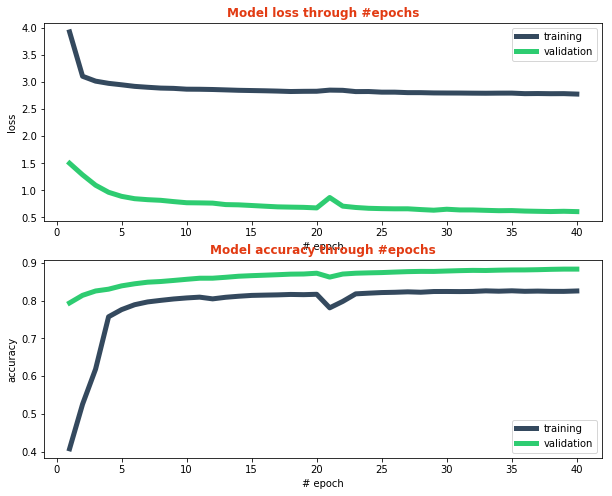

In [35]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

## Función que Permite convertir Indices en Tags

In [36]:
#ESTA FUNCION RECIBE EN sequences LA LISTA DE ORACIONES DONDE CADA ELEMENTO DE LA ORACION ES UN ONE HOT VECTOR
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

## Hacemos la prediccion sobre el conjunto de pruebas. De la distribución probabilítica a etiquetas.

In [37]:
import pandas as pd

prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

[u'ncms000', u'Fc', u'sps00', u'da0mp0', u'ncmp000', u'Fc', u'sps00', u'di0fs0', u'ncms000', u'sps00', u'sps00', u'da0mp0', u'ncmp000', u'Fc', u'ncfp000', u'vmn0000', u'sps00', u'ncms000', u'cc', u'Fc', u'vmis3s0', u'sps00', u'da0mp0', u'nccp000', u'ncmp000', u'Fc', u'da0ms0', u'aq0cs0', u'sps00', u'sps00', u'aq0ms0', u'ncmp000', u'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PA

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

       Expected Predicted
1       ncfp000   ncfp000
2        aq0fp0    aq0fp0
3        aq0cp0   nccp000
4       vmis3p0   vmis3p0
5            cs  pr0cn000
6       np0000p   np0000p
7      p0300000  p0300000
8       vmif3s0   np0000p
9         sps00     sps00
10      np0000p   np0000p
11        sps00     sps00
12       da0fs0    da0fs0
13      ncfs000   ncfs000
14     pr0cn000  pr0cn000
15      vmip3s0   vmip3s0
16        sps00     sps00
17       da0fp0    da0fp0
18      ncfp000   ncfp000
19       da0ms0    da0ms0
20      nccs000   nccs000
21       aq0ms0   np0000o
22           Fc        Fc
23      np0000p   np0000p
24           Fc        Fc
25        sps00     sps00
26     pr0cs000  pr0cs000
27      np0000o   np0000l
28      vmip3s0   ncfs000
29        spcms     spcms
30      ncms000   ncms000
...         ...       ...
38614    aq0cp0   ncms000
38615     sps00     sps00
38616   ncmp000   ncmp000
38617        cc        cc
38618   ncfp000   ncfp000
38619   vsip3s0   vsip3s0
38620       

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


('\nclassification_report:\n', u'              precision    recall  f1-score   support\n\n       -PAD-       0.00      0.00      0.00         0\n         Faa       0.00      0.00      0.00         9\n         Fat       0.00      0.00      0.00        13\n          Fc       1.00      1.00      1.00      2254\n          Fd       1.00      1.00      1.00        81\n          Fe       1.00      1.00      1.00       552\n          Fg       1.00      1.00      1.00       257\n         Fia       1.00      1.00      1.00         7\n         Fit       1.00      1.00      1.00        22\n          Fp       1.00      1.00      1.00      1174\n         Fpa       1.00      1.00      1.00       179\n         Fpt       1.00      1.00      1.00       180\n          Fs       1.00      0.80      0.89         5\n          Fx       1.00      1.00      1.00        43\n          Fz       0.00      0.00      0.00         4\n           W       0.96      0.69      0.80       173\n           X       0.00      0

## PARTE 4 - Testing

### Creamos un pequeño Ejemplo

In [38]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', '\xc3\xadndice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo y se generan los dos vecores de enteros de las dos oraciones

In [39]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)
print(test_samples_X.shape)

[[20697  8176  1235 16265 10785   240     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [ 9233 15787 12421  6748 12421  9233 10461  7895 12421     1  7856     1
    2

### Se Ejecuta la predicion con la Entrada del modelo entrenado y el modelo de la red neuronal predice un matriz de 149 X 291 por cada oración. El shape de a predicción es (2, 149,291)

In [40]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

(array([[[2.49836339e-05, 3.69732792e-04, 2.50276597e-03, ...,
         7.99096283e-03, 1.79780344e-03, 9.11063631e-04],
        [8.35073733e-05, 5.23608702e-04, 2.38839202e-04, ...,
         1.18928626e-02, 1.21601159e-04, 5.62280475e-04],
        [8.49374919e-05, 4.45844751e-04, 1.28008798e-03, ...,
         5.04577309e-02, 1.45684252e-03, 3.69022018e-04],
        ...,
        [9.99666572e-01, 2.60210385e-07, 2.98750649e-07, ...,
         3.51039239e-06, 3.37410242e-08, 7.22108723e-07],
        [9.99641418e-01, 2.76450635e-07, 3.15397557e-07, ...,
         3.74930733e-06, 3.52275258e-08, 7.84080612e-07],
        [9.99611318e-01, 2.96480039e-07, 3.39892722e-07, ...,
         4.04117691e-06, 3.74753526e-08, 8.59654278e-07]],

       [[1.01722166e-04, 5.47187403e-04, 1.80552815e-04, ...,
         7.98814744e-03, 1.13487607e-04, 7.89129059e-04],
        [4.43608587e-05, 4.37461829e-04, 1.87769753e-03, ...,
         4.84026074e-02, 1.84638635e-03, 1.25771179e-03],
        [1.48543288e-04,

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [41]:
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
# JUS FOR CHECKING!!!! - IGNORE IT
ll = {i: t for t, i in tag2index.items()}
print(ll[np.argmax(predictions[0][0])])
####################
print(log_tokens)


rg
[[u'rg', u'da0ms0', u'rg', u'sps00', u'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-',

### Presentación de los Resultados

In [42]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(goodPrint(heads2))
print(body2)


## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp

Correr    es      importante    para    mi    .
--------  ------  ------------  ------  ----  -----
rg        da0ms0  rg            sps00   Fp    -PAD-


El hombre bajo corre bajo el puente con bajo índice de adrenalina . 
[[u'da0ms0', u'ncms000', u'da0fp0', u'rg', u'Fc', u'Fc', u'Fc', u'sps00', u'da0ms0', u'ncfs000', u'sps00', u'ncfs000', u'Fp']]
